In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import house_sales_data

# 2.1 Linear functions

## Functions in Python

In [2]:
f = lambda x: x[0] + x[1] - x[3]**2
f([-1, 0, 1, 2])

-5

## Superposition

A function $F(x)$ that satisfies the superposition principle is called a [linear function](https://en.wikipedia.org/wiki/Linear_function).

Superposition can be defined by two simpler properties; [additivity](https://en.wikipedia.org/wiki/Additive_map) and [homogeneity](https://en.wikipedia.org/wiki/Homogeneous_function)

$$
\begin{align*}
& F(x_{1}+x_{2})=F(x_{1})+F(x_{2}), &\text{Additivity} \\
& F(a x)=a F(x), &\text{Homogeneity} \\
& \text{for scalar}\ a.\\
\end{align*}
$$

https://en.wikipedia.org/wiki/Superposition_principle

In [3]:
a = np.array([-2, 0, 1, -3])
x = np.array([2, 2, -1, 1])
y = np.array([0, 1, -1, 0])
alpha = 1.5
beta = -3.7
LHS = np.inner(alpha*x + beta*y, a)
RHS = alpha*np.inner(x, a) + beta*np.inner(y, a)
print('LHS:', LHS)
print('RHS:', RHS)

LHS: -8.3
RHS: -8.3


For the function $f(x) = a^\top x$, we have $f(e_3) = a_3$

In [4]:
a = np.array([-2,0,1,-3])
e3 = np.array([0,0,1,0])
print(e3 @ a)

1


In [5]:
avg1 = lambda x: np.inner((np.ones(len(x))/len(x)), x)
avg2 = lambda x: sum(x)/len(x)
x = np.array([1,-3,2,-1])
print(avg1(x))
print(avg2(x))

-0.25
-0.25


# 2.2 Taylor approximation

## Taylor approximation

The Taylor series of a real or complex-valued function $f(x)$ that is [infinitely differentiable](https://en.wikipedia.org/wiki/Infinitely_differentiable_function) at a real or complex number a is the power series

$$
{\displaystyle f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots ,}
$$
where $n!$ denotes the factorial of $n$. In the more compact sigma notation, this can be written as

$$
{\displaystyle \sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}(x-a)^{n},}
$$
where $f^{(a)}(n)$ denotes the nth derivative of $f$ evaluated at the point $a$. (The derivative of order zero of $f$ is defined to be $f$ itself and $(x − a)^0$ and $0!$ are [both defined to be 1](https://en.wikipedia.org/wiki/Empty_product).)

https://en.wikipedia.org/wiki/Taylor_series

The (first-order) Taylor approximation of function $f : R^n → R$, at the point $z$, is the affine function $\hat{f}(x)$ given by
$$
\hat{f}(x) = f(z) + ∇f(z)^\top(x − z)
$$
For $x$ near $z$, $\hat{f}(x)$ is very close to $f(x)$.

The following example shows the Taylor approximation of the function $f(x)$.
$$f(x) = x_1 + e^{(x_2 - x_1)}$$
$$\nabla f = [1 - e^{x_2 - x_1},\ e^{x_2 - x_1}]$$

In [6]:
f = lambda x: x[0] + np.exp(x[1] - x[0])
grad_f = lambda z: np.array([1 - np.exp(z[1] - z[0]), np.exp(z[1] - z[0])])

z = np.array([1, 2])

# Taylor approximation at z
f_hat = lambda x: f(z) + grad_f(z) @ (x - z)
f([1, 2]), f_hat([1, 2])

(3.718281828459045, 3.718281828459045)

In [7]:
f([0.96, 1.98]), f_hat([0.96,1.98])

(3.7331947639642977, 3.732647465028226)

In [8]:
f([1.10, 2.11]), f_hat([1.10, 2.11])

(3.845601015016916, 3.845464646743635)

In [9]:
f([1.5, 2]), f_hat([1.5, 2])

(3.148721270700128, 2.8591409142295223)

# 2.3 Regression model

## Regression model

The regression model is the affine function of $x$ given by $f(x) = x^T\beta + v$, where the n-vector $\beta$ and the scalar $v$ are the parameters in the model. The regression model is used to guess or approximate a real or observed value of the number $y$ that is associated with $x$. (We’ll see later how to find the parameters in a regression model, using data.)

In [10]:
# beta is an n-vector, aka a weight, 
# v is a scalar, aka offset, intercept
# x, y aka regressor, predictor


# parameters in regression model
beta = np.array([148.73, -18.85])
v = 54.40

y_hat = lambda x: x @ beta + v

# Evaluate regression model prediction
x = np.array([0.846, 1])
y = 115
y_hat(x), y

(161.37557999999999, 115)

In [11]:
x = np.array([1.324, 2])
y = 234.50
y_hat(x), y

(213.61852000000002, 234.5)

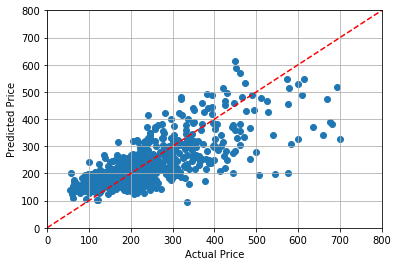

In [12]:
plt.ion()
D = house_sales_data()

price = D['price']
area = D['area']
beds = D['beds']

v = 54.4017 # scalar
beta = np.array([147.7251, -18.8534]) # weights
#scalar and weights were determined using a method learned in Ch13: Least Squares

predicted = v + beta[0]*area + beta[1]*beds

plt.scatter(price, predicted)
plt.plot((0,800),(0,800) ,ls='--', c = 'r')
plt.ylim(0,800)
plt.xlim(0,800)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()